# Unsupervised learning - PCA and clustering of US  Arrests notebook
ref: https://www.kaggle.com/datasets/kurohana/usarrets

In [2]:
!pip3 install pandas

     |████████████████████████████████| 12.4 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 7.9 kB/s eta 0:00:01    |▎                               | 174 kB 6.3 MB/s eta 0:00:03     |██                              | 1.0 MB 6.3 MB/s eta 0:00:03
     |████████████████████████████████| 346 kB 7.0 MB/s eta 0:00:01


In [4]:
!pip3 install matplotlib

     |████████████████████████████████| 9.2 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 6.5 MB/s eta 0:00:01


In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv", index_col='City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
print('Numer of cases: {} Number of features {}'.format(df.shape[0], df.shape[1]))

Numer of cases: 50 Number of features 4


In [3]:
# Let's rename the column Urban Pop
d = { 'UrbanPop':'Urban-Pop'}
df.rename(columns=d, inplace=True)
df.columns

Index(['Murder', 'Assault', 'Urban-Pop', 'Rape'], dtype='object')

Summarise the statistical properties of the columns

In [4]:
# Set the decimal precision
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats


,mean,std,min,max
Murder,7.8,4.4,0.8,17.4
Assault,170.8,83.3,45.0,337.0
Urban-Pop,65.5,14.5,32.0,91.0
Rape,21.2,9.4,7.3,46.0


Check if there are nay missing values

In [5]:
# Count the missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns =['missing'])
relevant_missing

,missing
Murder,0
Assault,0
Urban-Pop,0
Rape,0


Determine the type of each variable

In [6]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Murder     50 non-null     float64
 1   Assault    50 non-null     int64  
 2   Urban-Pop  50 non-null     int64  
 3   Rape       50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:
* Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

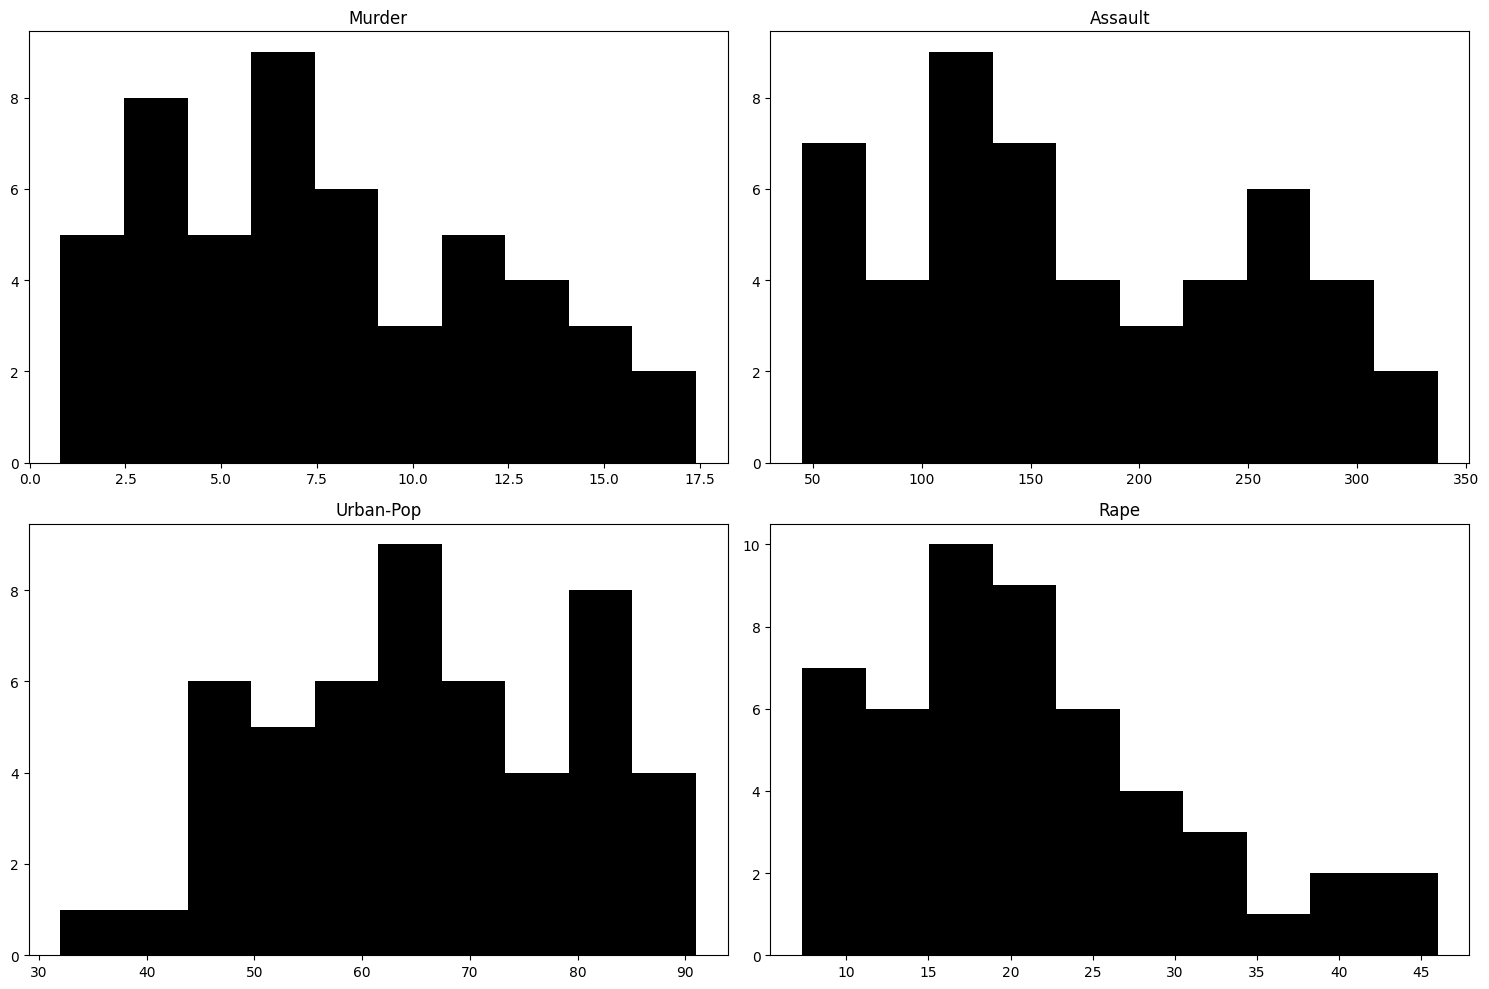

In [7]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

We can compile the tabular information we have so far into a single dataframe:

In [8]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary



,missing,mean,std,min,max
Murder,0,7.8,4.4,0.8,17.4
Assault,0,170.8,83.3,45.0,337.0
Urban-Pop,0,65.5,14.5,32.0,91.0
Rape,0,21.2,9.4,7.3,46.0


We can observe that Assault stands out as having the mean, max and std as the highest than the other variables.

# Correlation Analysis

Pandas offers a highly useful function, ``corr``, which allows us to compute correlations between the different columns. The standard correlation coefficient is the Pearson coefficient. It returns a matrix of values. It is often useful to visualise these as a plot. Both Pandas and Seaborn have functions for plotting correlation heatmaps, but Seaborn's offers more adjustabilty. We demonstrate the use of Seaborn's heatmap, using a mask to remove the top triangular half of correlations, as these are repeats.

In [21]:
#!pip3 install seaborn
!pip3 install scikit-learn

     |████████████████████████████████| 11.1 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 13 kB/s  eta 0:00:01


In [112]:
cities = df.index
corr_df = df.drop(["Urban-Pop"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

#Include all the features
#corr_df = df.corr()
#labels =corr_df.columns

<Axes: >

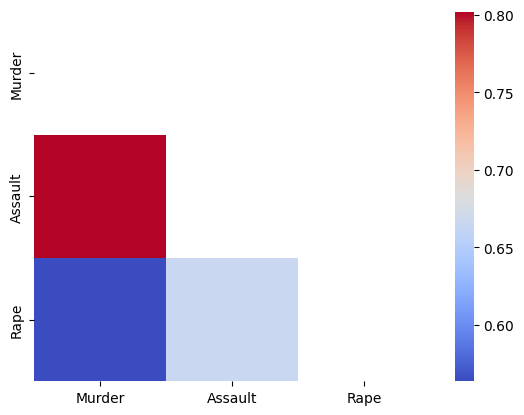

In [113]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape))
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

Assault are positive correlated with Murder. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively/not so much correlated variables are blue: a decrease in one means an increase in the other.

# PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 

In [136]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = df.drop(["Urban-Pop"], axis =1).values.squeeze()

X = df.values.squeeze()
pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()


,0,1,2,3
0,64.8,11.4,-2.5,2.4
1,92.8,18.0,20.1,-4.1
2,124.1,-8.8,-1.7,-4.4
3,18.3,16.7,0.2,-0.5
4,107.4,-22.5,6.7,-2.8


In [137]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [138]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [139]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [145]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))
    # to correct the indexing
    for i in range(n-1):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

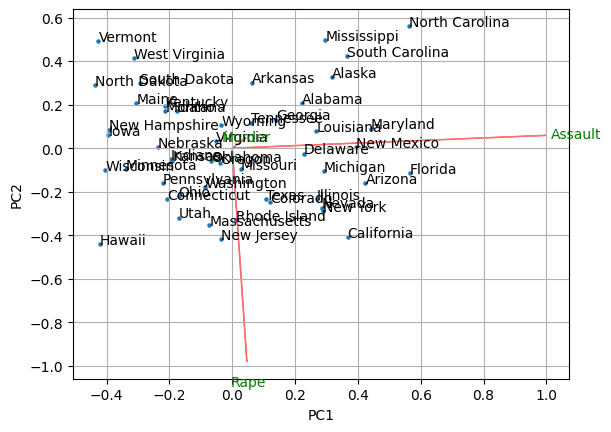

In [146]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that Assault and the Rape rates are the most important featuresas the arrows to each of these dominate the biplot.

This information can also be quantified as follows:

In [167]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.1f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

#Include all the features
corr_df = df.corr()
labels =corr_df.columns

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df.shape

feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.0,0.0
1,Assault,1.0,0.1
2,Urban-Pop,0.0,1.0
3,Rape,0.1,0.2



We see that the Assault has by far the highest importance in the first principle component, and Urban-Pop the highest int the second principle component. These observations agree with those deduced from the biplot. If we refer to our summarised statistics from earlier on, the mean values for these features are much larger numbers than those for the other features. It is possible that because of this, these features 'swamp' the others, which results in them being ignored.

### Standardised data

We standardise the data so that some features do not swamp the others.

In [168]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,1.0,1.1,-0.4,0.2
1,2.0,1.1,2.0,-0.4
2,1.8,-0.7,0.1,-0.8
3,-0.1,1.1,0.1,-0.2
4,2.5,-1.5,0.6,-0.3


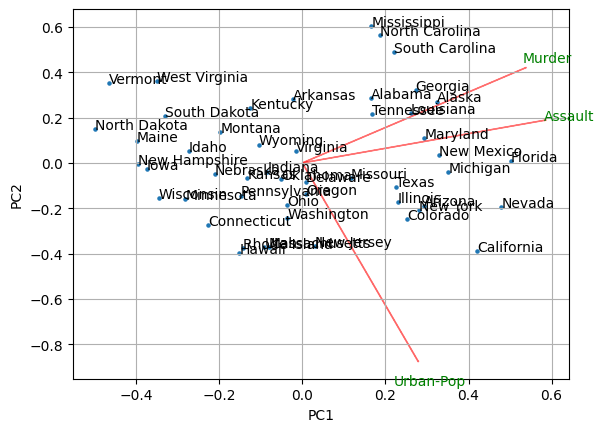

In [169]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [170]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.5,0.4
1,Assault,0.6,0.2
2,Urban-Pop,0.3,0.9
3,Rape,0.5,0.2


Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, with only some with low importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

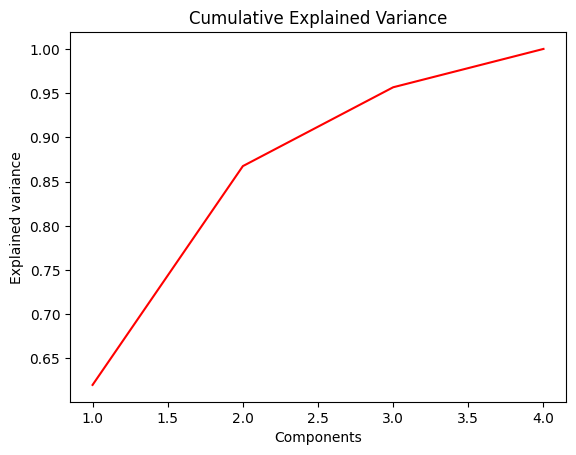

In [171]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

The first 2 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 4 variables and now we have 2 variables explaining most of the variability. 


In [172]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2,3
City,,,,
Alabama,1.0,1.1,-0.4,0.2
Alaska,2.0,1.1,2.0,-0.4
Arizona,1.8,-0.7,0.1,-0.8
Arkansas,-0.1,1.1,0.1,-0.2
California,2.5,-1.5,0.6,-0.3


## Hierarchical clustering


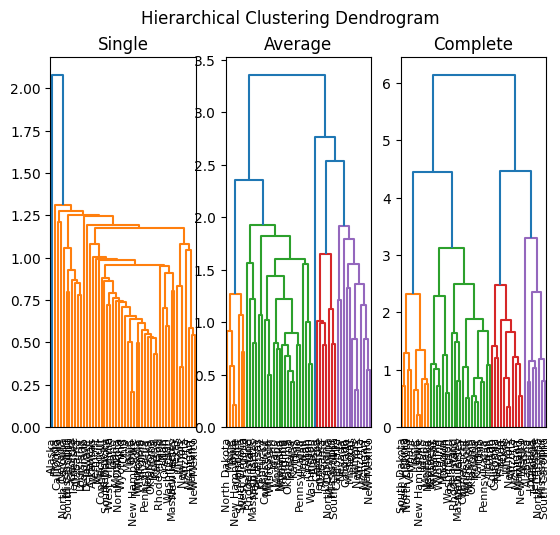

In [173]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

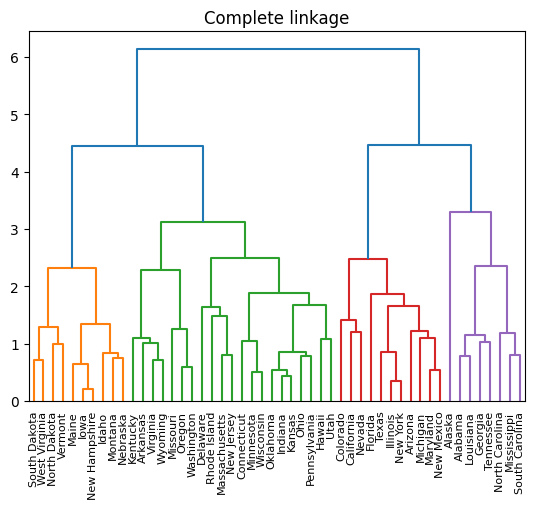

In [174]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.


/home/s/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


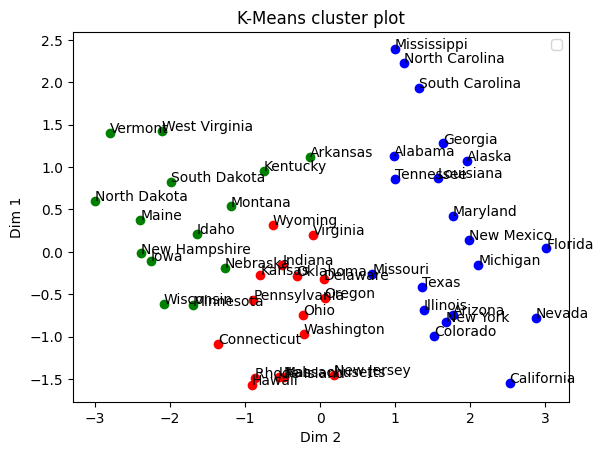

In [175]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [176]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]


group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]
group2 = np.array(cities)[group2_indices]
#df.iloc[:,0]
#
print("Group 0: {}\n\n".format([df.loc[x]["Murder"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["Assault"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["Rape"] for x in group2]))

Group 0: [3.3, 5.9, 5.3, 7.2, 6.0, 4.4, 7.4, 7.3, 6.6, 4.9, 6.3, 3.4, 3.2, 8.5, 4.0, 6.8]


Group 1: [236.0, 263.0, 294.0, 276.0, 204.0, 335.0, 211.0, 249.0, 249.0, 300.0, 255.0, 259.0, 178.0, 252.0, 285.0, 254.0, 337.0, 279.0, 188.0, 201.0]


Group 2: [19.5, 14.2, 11.3, 16.3, 7.8, 14.9, 16.4, 16.5, 9.5, 7.3, 12.8, 11.2, 9.3, 10.8]


